# Prueba TécnicaDirector de DS

Este dataset representa 10 años (1999-2008) de atención clínica en 130 hospitales y redes integradas de prestación de servicios de EE. UU. Incluye más de 50 funciones que representan los resultados del paciente y del hospital. Se extrajo información de la base de datos para los ingresos que cumplieron con los siguientes criterios.

(1) Es un ingreso hospitalario (una admisión hospitalaria).

(2) Es un ingreso diabético, es decir, durante el cual se ingresó al sistema cualquier tipo de diabetes como diagnóstico.

(3) La duración de la estancia fue de al menos 1 día y como máximo 14 días.

(4) Se realizaron pruebas de laboratorio durante la estancia.

(5) Se administraron medicamentos durante la estancia.

 

Los datos contienen atributos tales como número de paciente, raza, sexo, edad, tipo de admisión, tiempo en el hospital, especialidad médica del médico que lo admite, número de pruebas de laboratorio realizadas, resultado de la prueba de HbA1c, diagnóstico, cantidad de medicación, medicamentos para diabéticos, cantidad de pacientes ambulatorios , visitas hospitalarias y urgentes en el año anterior a la hospitalización, etc. Para cada registro existe uno de los siguientes resultados:

No readmisión;

Readmisión en menos de 30 días (esta situación no es buena, porque existe la posibilidad de que el tratamiento aplicado no fue apropiado);

Readmisión después de 30 días (esta situación tampoco es buena, sin embargo, la razón podría estar relacionada con el estado del paciente).

Para tu tarea puedes escoger entre clasificar el resultado de un paciente o clusterizarlos para encontrar patrones que puedan darnos diferentes insights. Te recomendamos que crees un notebook, como Jupyter(si usas python) o Rmarkdown report (si usas R) y lo compartas con nosotros a través de un link de github. 

 

Tip para el éxito en esta tarea: Define claramente el procedimiento (paso a paso que debe quedar en el notebook en celdas tipo Markdown) que vas a ejecutar sobre el dataset y resalta los aspectos más importantes sobre los cuales consideres que podemos discutir. 

 

Tienes un día para desarrollar este ejercicio.

Plazo maximo para entrega: Domingo 8pm

In [199]:
# cargando librerias
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [304]:
# leyendo archivo
df = pd.read_csv("diabetic_data.csv")


In [305]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [306]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [314]:
conteo_por_paciente = df['patient_nbr'].value_counts()

print('filas: {}'.format(len(df)))
print('pacientes unicos: {}'.format(len(conteo_por_paciente)))
print('pacientes en un solo registro: {}'.format(np.sum(conteo_por_paciente==1)))
print('pacientes repetidos: {}'.format(np.sum(conteo_por_paciente>1)))

filas: 101766
pacientes unicos: 71518
pacientes en un solo registro: 54745
pacientes repetidos: 16773


In [315]:
indexes = df['patient_nbr'].drop_duplicates(keep='first').index
df = df.iloc[indexes]
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),?,1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),?,1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Tratamiento de datos

In [316]:
# identificadores de tipos, no son valores numéricos
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)

# columnas categoricas con un único valor
df.drop(columns=['examide', 'citoglipton'], inplace=True)

# columnas categoricas con cardinalidad demasiado alta, se recomienda realizar un tratamiento de selección o agrupamiento con un experto
df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

# columna con demasiados valores perdidos
df.drop(columns=['weight'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [317]:
# variables booleanas con texto en lugar de valores binarios
df['change'] = (df['change'] != 'No').astype(int)
df['diabetesMed'] = (df['diabetesMed'] != 'No').astype(int)
df['readmitted'] = (df['readmitted'] != 'NO').astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   admission_type_id         71518 non-null  object
 6   discharge_disposition_id  71518 non-null  object
 7   admission_source_id       71518 non-null  object
 8   time_in_hospital          71518 non-null  int64 
 9   payer_code                71518 non-null  object
 10  medical_specialty         71518 non-null  object
 11  num_lab_procedures        71518 non-null  int64 
 12  num_procedures            71518 non-null  int64 
 13  num_medications           71518 non-null  int64 
 14  number_outpatient    

## Explorando variables numéricas

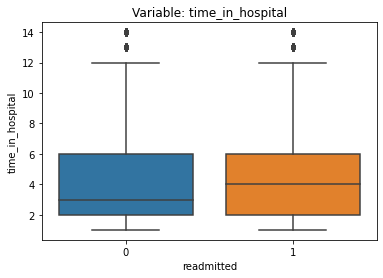

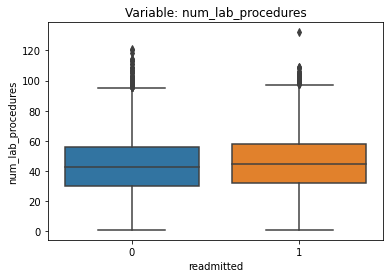

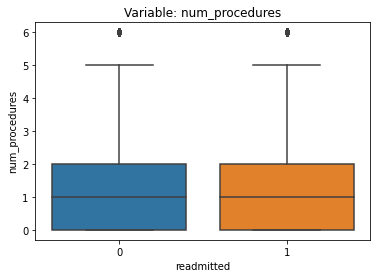

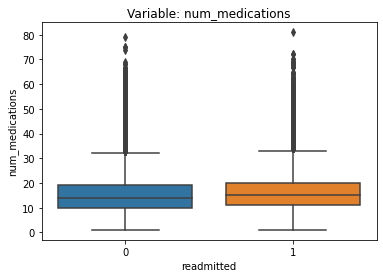

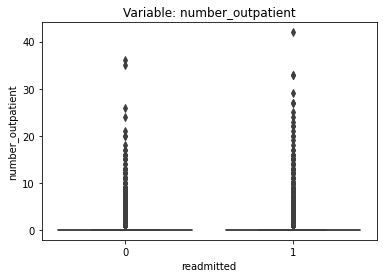

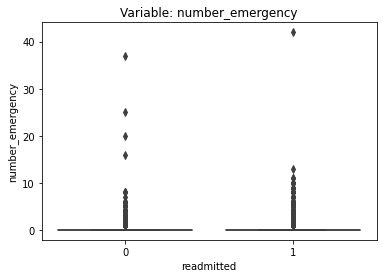

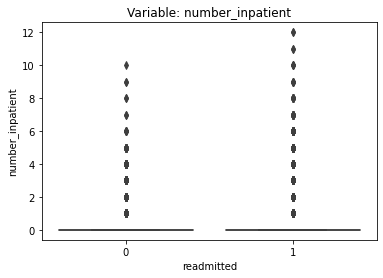

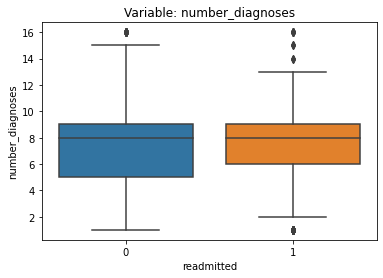

In [319]:
numeric_variables = ['time_in_hospital', 'num_lab_procedures', 
                     'num_procedures', 'num_medications', 
                     'number_outpatient', 'number_emergency', 
                     'number_inpatient', 'number_diagnoses']


for i, col in enumerate(numeric_variables):
    plt.figure(i)
    sn.boxplot(x="readmitted", y=col, data=df).set_title('Variable: {}'.format(col))

# hay atípicos pero debido a que la mayoría de las observaciones tienen valor en cero, si quitamos los atípicos la variable va a quedar inservible

In [320]:
# no tenemos una variable de clase desbalanceada
df['readmitted'].value_counts()

0    42985
1    28533
Name: readmitted, dtype: int64

In [321]:
# correlación variables numéricas, no tenemos una correlación considerable en ningún par de variables
df[numeric_variables].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.330146,0.188911,0.469426,-0.014984,-0.009805,0.063736,0.233338
num_lab_procedures,0.330146,1.000000,0.050072,0.261911,-0.006933,0.014091,0.080162,0.157574
num_procedures,0.188911,0.050072,1.000000,0.403738,-0.018347,-0.035178,-0.023977,0.089153
num_medications,0.469426,0.261911,0.403738,1.000000,0.026183,0.002400,0.037487,0.259201
number_outpatient,-0.014984,-0.006933,-0.018347,0.026183,1.000000,0.095002,0.068591,0.076612
number_emergency,-0.009805,0.014091,-0.035178,0.002400,0.095002,1.000000,0.146547,0.049239
number_inpatient,0.063736,0.080162,-0.023977,0.037487,0.068591,0.146547,1.000000,0.069151
number_diagnoses,0.233338,0.157574,0.089153,0.259201,0.076612,0.049239,0.069151,1.000000


In [322]:
df.shape

(71518, 44)

In [251]:
# los cambios de dosis en los medicamentos no son muy comunes, 
# por esto, tomaremos la información únicamente discriminando si se le dió o no el medicamento al paciente
medicamentos = ['metformin', 
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide', 
'insulin',  
'glyburide-metformin', 
'glipizide-metformin', 
'glimepiride-pioglitazone',
'metformin-rosiglitazone' , 
'metformin-pioglitazone']
for med in medicamentos:
    df[med] = (df[med] != 'No').astype(int)

In [252]:
# columnas categoricas 
categorical_columns = ['race', 'gender', 'age', 'admission_type_id', 
                    'discharge_disposition_id', 'admission_source_id', 
                    'payer_code', 'medical_specialty', 
#                        'diag_1', 'diag_2', 'diag_3', 
                   'max_glu_serum', 'A1Cresult']

In [253]:
# se transforman las columnas categóricas a variables dummies
df2 = pd.merge(df, pd.get_dummies(df[categorical_columns]), left_index=True, right_index=True)
df2.drop(columns=categorical_columns, inplace=True)
# df2.drop(columns=['race','gender','age'], inplace=True)

In [254]:
df2.head() 

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm
0,2278392,8222157,1,41,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,149190,55629189,3,59,0,18,0,0,0,9,...,0,0,0,0,1,0,0,0,1,0
2,64410,86047875,2,11,5,13,2,0,1,6,...,0,0,0,0,1,0,0,0,1,0
3,500364,82442376,2,44,1,16,0,0,0,7,...,0,0,0,0,1,0,0,0,1,0
4,16680,42519267,1,51,0,8,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0


In [213]:
# partiendo el conjunto de datos de entrenamiento y pruebas
X = df2.drop(columns=['encounter_id', 'patient_nbr', 'readmitted'])
y = df2['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print('shape X_train: '+ str(X_train.shape))
print('shape X_test: '+ str(X_test.shape))
print('shape y_train: '+ str(y_train.shape))
print('shape y_test: '+ str(y_test.shape))

shape X_train: (53638, 198)
shape X_test: (17880, 198)
shape y_train: (53638,)
shape y_test: (17880,)


In [214]:
y_train.value_counts()

0    32254
1    21384
Name: readmitted, dtype: int64

In [215]:
# estandarizando variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

## Modelado

In [280]:
# como baselina se usa un clasificador dummy que, siguiendo una distribución uniforme, 
# hace preducciones aleatorias de readmitido o no-readmitido
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_scaled, y_train)
dummy_clf_train_predicted = dummy_clf.predict(X_train_scaled)
dummy_clf_test_predicted = dummy_clf.predict(X_test_scaled)

# métricas del baseline
print('Accuracy - train:{} - test:{} '.format(accuracy_score(y_train, dummy_clf_train_predicted), accuracy_score(y_test, dummy_clf_test_predicted)))
print('Precision - train:{} - test:{} '.format(precision_score(y_train, dummy_clf_train_predicted), precision_score(y_test, dummy_clf_test_predicted)))
print('Recall - train:{} - test:{} '.format(recall_score(y_train, dummy_clf_train_predicted), recall_score(y_test, dummy_clf_test_predicted)))
print('f1_score - train:{} - test:{} '.format(f1_score(y_train, dummy_clf_train_predicted), f1_score(y_test, dummy_clf_test_predicted)))


Accuracy - train:0.5054066147134494 - test:0.5026845637583892 
Precision - train:0.4042006479722936 - test:0.40233105457805673 
Recall - train:0.5075757575757576 - test:0.502168135403553 
f1_score - train:0.4500279868151005 - test:0.4467396714783475 


## Validación cruzada - búsqueda aleatoria de hiperparámetros

In [295]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 450, stop = 550, num = 4)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 50, num = 4)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [25, 30, 40, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 20, 30, 38]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [450, 483, 516, 550], 'max_features': ['sqrt'], 'max_depth': [40, 43, 46, 50], 'min_samples_split': [25, 30, 40, 50], 'min_samples_leaf': [20, 30, 38], 'bootstrap': [True]}


In [296]:
# buscando aleatoriamente hiperparámetros, si se quisiera mejorar el modelo se podría realizar una búsqueda más exhaustiva
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 20.6min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [297]:
rf_random.best_params_

# si algo se muere
# {'n_estimators': 550,
#  'min_samples_split': 40,
#  'min_samples_leaf': 15,
#  'max_features': 'sqrt',
#  'max_depth': 40,
#  'bootstrap': True}

{'n_estimators': 483,
 'min_samples_split': 40,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [298]:
rf=RandomForestClassifier(**rf_random.best_params_).fit(X_train_scaled, y_train)
y_pred_rf=rf.predict(X_test_scaled)
y_pred_rf_train=rf.predict(X_train_scaled)

In [299]:
print('Accuracy - train:{} - test:{} '.format(accuracy_score(y_train, y_pred_rf_train), accuracy_score(y_test, y_pred_rf)))
print('Precision - train:{} - test:{} '.format(precision_score(y_train, y_pred_rf_train), precision_score(y_test, y_pred_rf)))
print('Recall - train:{} - test:{} '.format(recall_score(y_train, y_pred_rf_train), recall_score(y_test, y_pred_rf)))
print('f1_score - train:{} - test:{} '.format(f1_score(y_train, y_pred_rf_train), f1_score(y_test, y_pred_rf)))

# Accuracy - train:0.6733845408106194 - test:0.6434563758389261 
# Precision - train:0.7474075022404302 - test:0.6560483870967742 
# Recall - train:0.2730078563411897 - test:0.22758427752133165 
# f1_score - train:0.39993149511902726 - test:0.33793748052757294 

Accuracy - train:0.6633916253402439 - test:0.6412192393736018 
Precision - train:0.7257561372575614 - test:0.6568376068376068 
Recall - train:0.25023381967826414 - test:0.21499510421037907 
f1_score - train:0.37215286712800366 - test:0.32395405206028033 


In [235]:
confusion = confusion_matrix(y_test, y_pred_rf)
confusion

array([[9878,  853],
       [5522, 1627]], dtype=int64)

In [236]:
# Ejemplo Curvas de aprendizaje
from sklearn.model_selection import learning_curve
from sklearn.utils import parallel_backend
with parallel_backend('threading'):
    train_sizes, train_scores, test_scores = learning_curve(estimator=rf,
                        X=X_train_scaled, y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                        n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

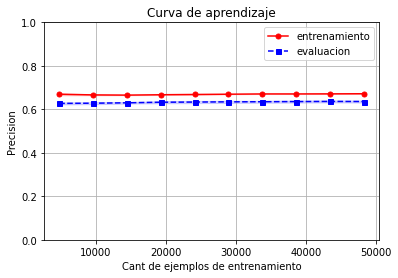

In [292]:
# graficando las curvas
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje')
plt.legend(loc='upper right')
plt.xlabel('Cant de ejemplos de entrenamiento')
plt.ylabel('Precision')
# plt.ylim(0,1)
plt.show()

## Importancia de las variables

In [288]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols': df.columns,'imp':m.feature_importances_}).sort_values('imp',ascending = False)

fi=rf_feat_importance(rf,X)

<AxesSubplot:ylabel='cols'>

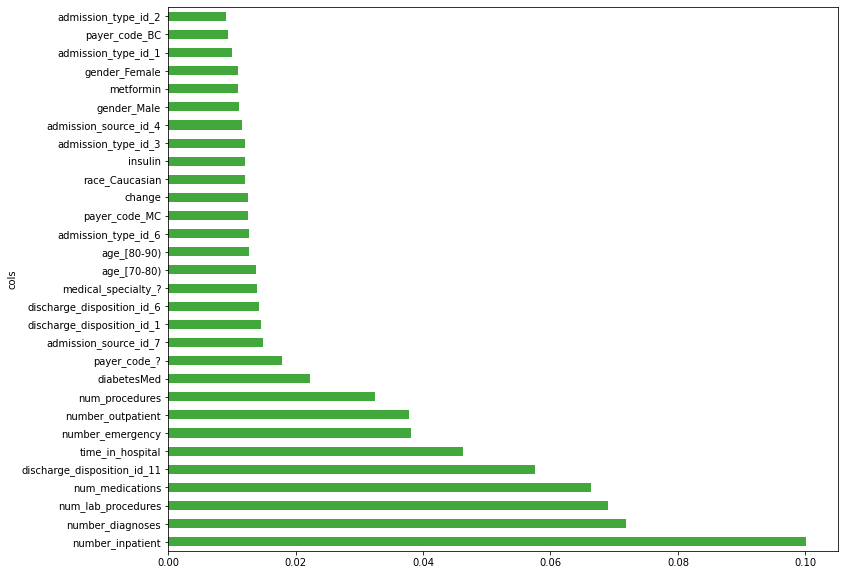

In [289]:
def plot_fi(fi):
    return fi.plot('cols','imp','barh', figsize=(12,10), legend=False, color='#43A83B')
plot_fi(fi[:30])